In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [2]:
def calc_mol_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    tpsa = Descriptors.TPSA(mol)
    Rings = Descriptors.RingCount(mol)
    AroRings = Descriptors.NumAromaticRings(mol)
    h_donors = Descriptors.NumHDonors(mol)
    h_acceptors = Descriptors.NumHAcceptors(mol)
    return mol_weight, logp, rotatable_bonds, tpsa,Rings, AroRings, h_donors, h_acceptors

In [3]:
data_flavor = pd.read_csv('BST.csv',encoding = 'gb2312')['SMILES']

In [4]:
data = {'smiles': [], 'weight': [], 'logp': [], 'rotatable_bonds': [], 'tpsa': [],'rings': [],'AroRings': [], 'h_donors': [], 'h_acceptors': []}

In [5]:
for smiles in data_flavor:
    mol_weight, logp, rotatable_bonds, tpsa,rings,AroRings,h_donors, h_acceptors = calc_mol_properties(smiles)
    data['smiles'].append(smiles)
    data['weight'].append(mol_weight)
    data['logp'].append(logp)
    data['rotatable_bonds'].append(rotatable_bonds)
    data['tpsa'].append(tpsa)
    data['rings'].append(rings)
    data['AroRings'].append(AroRings)
    data['h_donors'].append(h_donors)
    data['h_acceptors'].append(h_acceptors)

In [6]:
df_data = pd.DataFrame(data)
df_data

,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
0,Br.Br.CC1C2CCC3C4CC=C5CC(N(C)C)CCC5(C)C4CCC32CN1C,518.422,5.96540,1,6.48,5,0,0,2
1,Br.COC(=O)C1=CCCN(C)C1,236.109,0.99920,1,29.54,1,0,0,3
2,C#CCCCCCCCCCCCC(O)CC(O)CO,284.440,3.01490,14,60.69,0,0,3,3
3,C#CCCCCCCCCCCCC(O)CC(O)COC(C)=O,326.477,3.58570,15,66.76,0,0,2,4
4,C#N,27.026,0.13978,0,23.79,0,0,0,1
...,...,...,...,...,...,...,...,...,...
13021,O=C1N(CC2=NC=CC=C2)CC3N1CCN(CC=4C=CC=CC4)C3,322.412,2.20360,4,39.68,4,2,0,3
13022,O=C1N(CC=2C=NC=CC2)CC3N1CCN(C3)C4CCOCC4,316.405,1.18240,3,48.91,4,1,0,4
13023,O=C1N(C=2C=CC=CC2)CC3N1CCN(C3)C4CCN(C(=O)C)CC4,342.443,1.62370,2,47.10,4,1,0,3
13024,O=C1N(C=2C=CC=CC2)CC3N1CCN(CC4=NC=CC=C4)C3,308.385,2.20800,3,39.68,4,2,0,3


381.23652126912464
0.5410803047750672
7.7616305849838785
124.38681943804698
2.1708889912482725
0.8914478734838016
3.6874712114233072
6.538077690772302


In [13]:
bitter = df_data[0:1946]
sweet = df_data[1946:8045]
tasteless = df_data[8045:]

In [15]:
print(bitter['weight'].mean())
print(bitter['logp'].mean())
print(bitter['rotatable_bonds'].mean())
print(bitter['tpsa'].mean())
print(bitter['rings'].mean())
print(bitter['AroRings'].mean())
print(bitter['h_donors'].mean())
print(bitter['h_acceptors'].mean())

366.2123614766702
1.4705666649537523
4.3720452209660845
100.45258478931142
3.0164439876670093
0.9794450154162384
2.5606372045220964
5.967625899280575


In [16]:
print(sweet['weight'].mean())
print(sweet['logp'].mean())
print(sweet['rotatable_bonds'].mean())
print(sweet['tpsa'].mean())
print(sweet['rings'].mean())
print(sweet['AroRings'].mean())
print(sweet['h_donors'].mean())
print(sweet['h_acceptors'].mean())

361.4330168253839
-1.3537594277750422
7.661419904902443
145.73887358583374
1.454992621741269
0.5530414822101984
4.695851778980161
6.846040334481063


In [17]:
print(tasteless['weight'].mean())
print(tasteless['logp'].mean())
print(tasteless['rotatable_bonds'].mean())
print(tasteless['tpsa'].mean())
print(tasteless['rings'].mean())
print(tasteless['AroRings'].mean())
print(tasteless['h_donors'].mean())
print(tasteless['h_acceptors'].mean())

411.354688014455
2.4980863420999806
9.208592652077895
107.59297129090545
2.717125075286087
1.271431439469986
2.8929933748243326
6.383858662919093


In [14]:
bitter

,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
0,Br.Br.CC1C2CCC3C4CC=C5CC(N(C)C)CCC5(C)C4CCC32CN1C,518.422,5.96540,1,6.48,5,0,0,2
1,Br.COC(=O)C1=CCCN(C)C1,236.109,0.99920,1,29.54,1,0,0,3
2,C#CCCCCCCCCCCCC(O)CC(O)CO,284.440,3.01490,14,60.69,0,0,3,3
3,C#CCCCCCCCCCCCC(O)CC(O)COC(C)=O,326.477,3.58570,15,66.76,0,0,2,4
4,C#N,27.026,0.13978,0,23.79,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1941,c1ccnnc1,80.090,0.47660,0,25.78,1,1,0,2
1942,c1cn[nH]c1,68.079,0.40970,0,28.68,1,1,1,1
1943,c1cnccn1,80.090,0.47660,0,25.78,1,1,0,2
1944,c1cncnc1,80.090,0.47660,0,25.78,1,1,0,2


In [19]:
bitter_wt = bitter['weight'].tolist()
sweet_wt = sweet['weight'].tolist()
tasteless_wt = tasteless['weight'].tolist()

bitter_lp = bitter['logp'].tolist()
sweet_lp = sweet['logp'].tolist()
tasteless_lp = tasteless['logp'].tolist()

bitter_rb = bitter['rotatable_bonds'].tolist()
sweet_rb = sweet['rotatable_bonds'].tolist()
tasteless_rb = tasteless['rotatable_bonds'].tolist()

bitter_tpsa = bitter['tpsa'].tolist()
sweet_tpsa = sweet['tpsa'].tolist()
tasteless_tpsa = tasteless['tpsa'].tolist()

bitter_r = bitter['rings'].tolist()
sweet_r = sweet['rings'].tolist()
tasteless_r = tasteless['rings'].tolist()

bitter_ar = bitter['AroRings'].tolist()
sweet_ar = sweet['AroRings'].tolist()
tasteless_ar = tasteless['AroRings'].tolist()

bitter_hd = bitter['h_donors'].tolist()
sweet_hd = sweet['h_donors'].tolist()
tasteless_hd = tasteless['h_donors'].tolist()

bitter_ha = bitter['h_acceptors'].tolist()
sweet_ha = sweet['h_acceptors'].tolist()
tasteless_ha = tasteless['h_acceptors'].tolist()

In [20]:
data1 = {'Weight': ['bitter'] * len(bitter_wt) + ['sweet'] * len(sweet_wt) + ['tasteless'] * len(tasteless_wt),
        'Value': bitter_wt + sweet_wt + tasteless_wt}

data2 = {'LogP': ['bitter'] * len(bitter_lp) + ['sweet'] * len(sweet_lp) + ['tasteless'] * len(tasteless_lp),
        'Value': bitter_lp + sweet_lp + tasteless_lp}

data3 = {'Rotatable_bonds': ['bitter'] * len(bitter_rb) + ['sweet'] * len(sweet_rb) + ['tasteless'] * len(tasteless_rb),
        'Value': bitter_rb + sweet_rb + tasteless_rb}

data4 = {'TPSA': ['bitter'] * len(bitter_tpsa) + ['sweet'] * len(sweet_tpsa) + ['tasteless'] * len(tasteless_tpsa),
        'Value': bitter_tpsa + sweet_tpsa + tasteless_tpsa}

data5 = {'Rings': ['bitter'] * len(bitter_r) + ['sweet'] * len(sweet_r) + ['tasteless'] * len(tasteless_r),
        'Value': bitter_r + sweet_r + tasteless_r}

data6 = {'AroRings': ['bitter'] * len(bitter_ar) + ['sweet'] * len(sweet_ar) + ['tasteless'] * len(tasteless_ar),
        'Value': bitter_ar + sweet_ar + tasteless_ar}

data7 = {'H_donors': ['bitter'] * len(bitter_hd) + ['sweet'] * len(sweet_hd) + ['tasteless'] * len(tasteless_hd),
        'Value': bitter_hd + sweet_hd + tasteless_hd}

data8 = {'H_acceptors': ['bitter'] * len(bitter_ha) + ['sweet'] * len(sweet_ha) + ['tasteless'] * len(tasteless_ha),
        'Value': bitter_ha + sweet_ha + tasteless_ha}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)
df7 = pd.DataFrame(data7)
df8 = pd.DataFrame(data8)

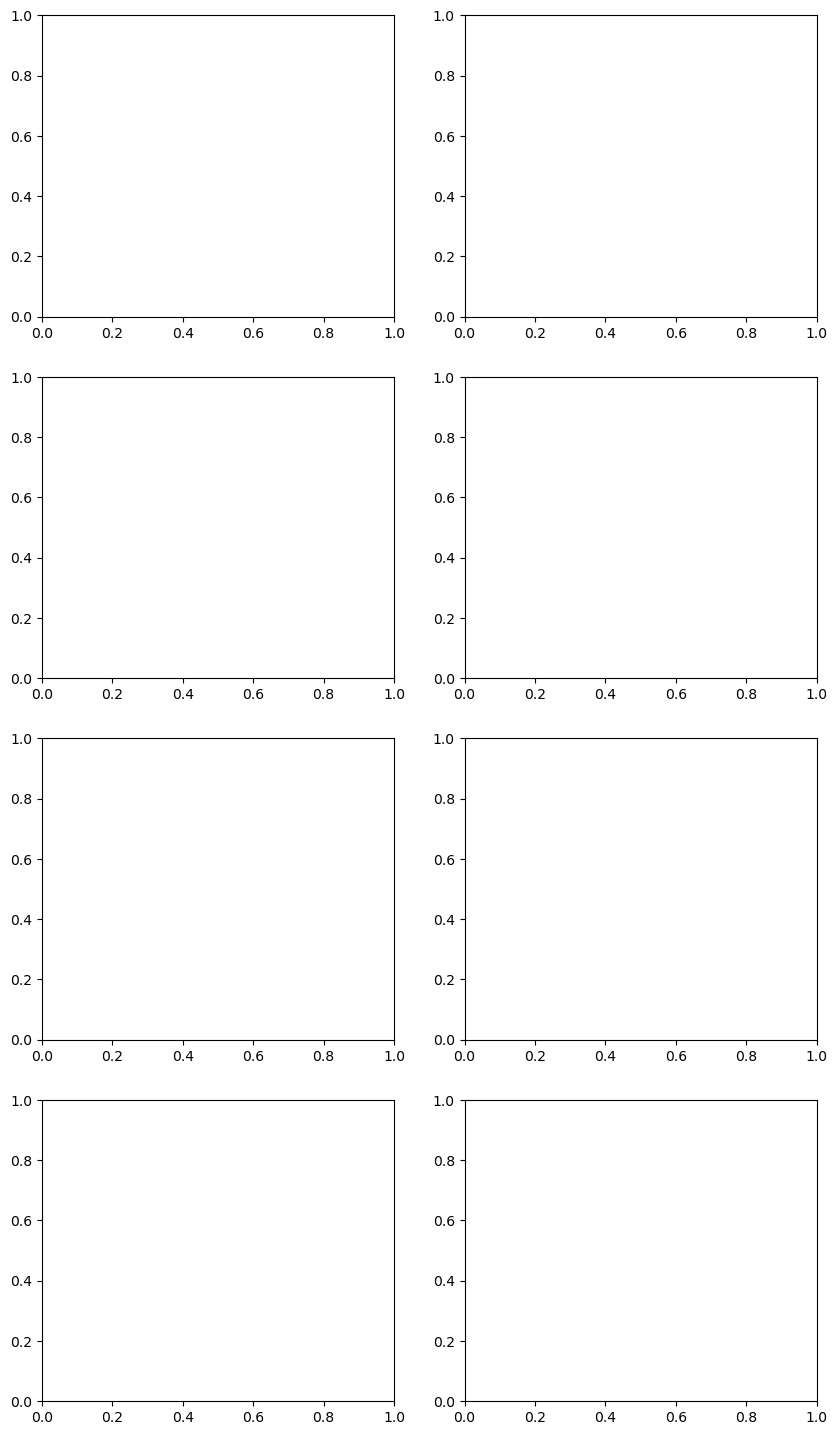

In [21]:
fig_box, axes_box = plt.subplots(4, 2, figsize=(10, 18))

In [22]:
sns.boxplot(x='Weight', y='Value', data=df1, ax=axes_box[0][0],showfliers=False)
sns.boxplot(x='LogP', y='Value', data=df2, ax=axes_box[0][1],showfliers=False)
sns.boxplot(x='Rotatable_bonds', y='Value', data=df3, ax=axes_box[1][0],showfliers=False)
sns.boxplot(x='TPSA', y='Value', data=df4, ax=axes_box[1][1],showfliers=False)
sns.boxplot(x='Rings', y='Value', data=df5, ax=axes_box[2][0],showfliers=False)
sns.boxplot(x='AroRings', y='Value', data=df6, ax=axes_box[2][1],showfliers=False)
sns.boxplot(x='H_donors', y='Value', data=df7, ax=axes_box[3][0],showfliers=False)
sns.boxplot(x='H_acceptors', y='Value', data=df8, ax=axes_box[3][1],showfliers=False)

<Axes: xlabel='H_acceptors', ylabel='Value'>

In [23]:
for i in range(4):
    for j in range(2):
        axes_box[i][j].set_ylabel('')

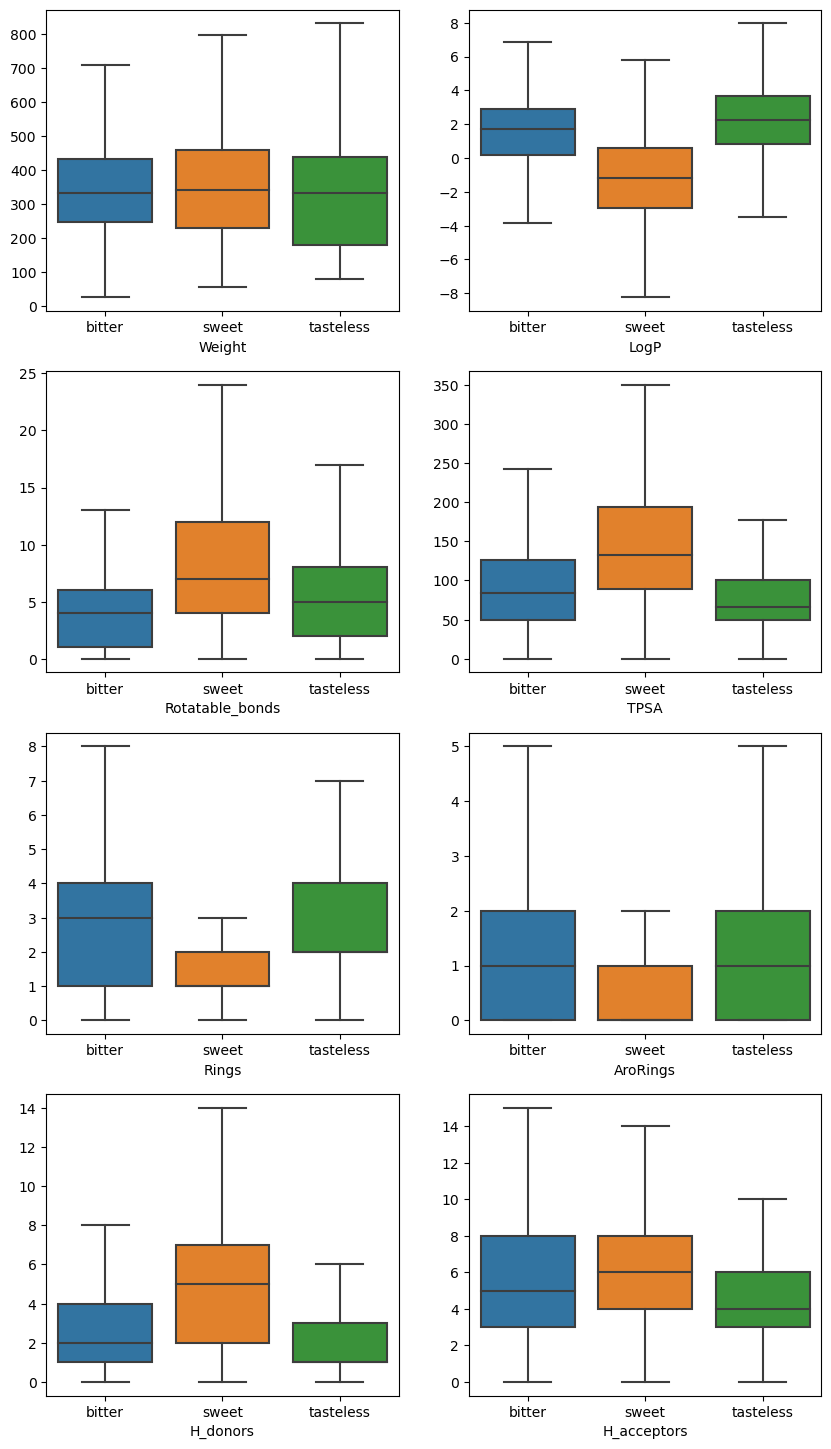

In [24]:
fig_box

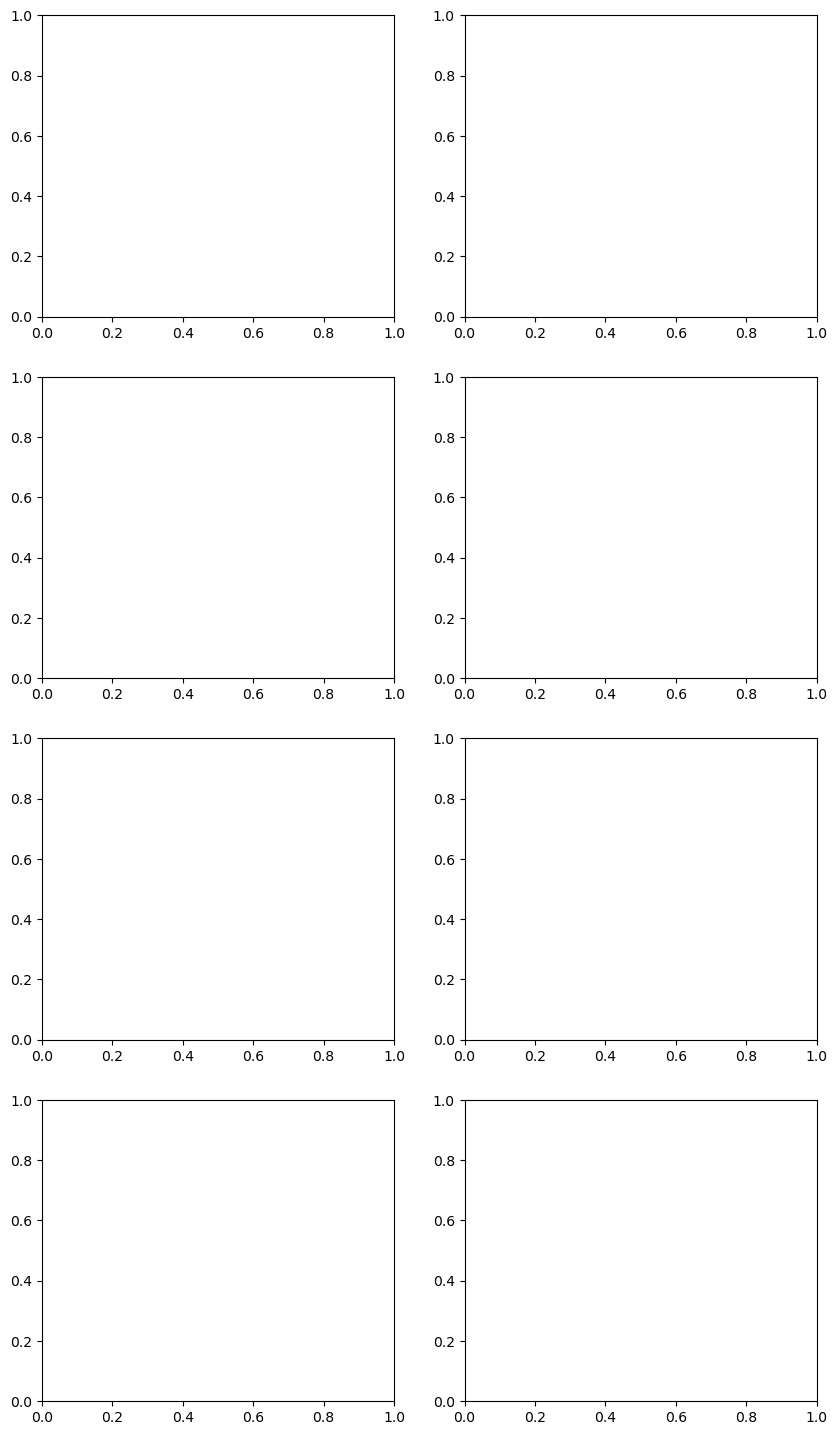

In [25]:
fig_violin, axes_violin = plt.subplots(4, 2, figsize=(10, 18))

In [26]:
sns.violinplot(x='Weight', y='Value', data=df1, ax=axes_violin[0][0],showfliers=False)
sns.violinplot(x='LogP', y='Value', data=df2, ax=axes_violin[0][1],showfliers=False)
sns.violinplot(x='Rotatable_bonds', y='Value', data=df3, ax=axes_violin[1][0],showfliers=False)
sns.violinplot(x='TPSA', y='Value', data=df4, ax=axes_violin[1][1],showfliers=False)
sns.violinplot(x='Rings', y='Value', data=df5, ax=axes_violin[2][0],showfliers=False)
sns.violinplot(x='AroRings', y='Value', data=df6, ax=axes_violin[2][1],showfliers=False)
sns.violinplot(x='H_donors', y='Value', data=df7, ax=axes_violin[3][0],showfliers=False)
sns.violinplot(x='H_acceptors', y='Value', data=df8, ax=axes_violin[3][1],showfliers=False)

<Axes: xlabel='H_acceptors', ylabel='Value'>

In [27]:
for i in range(4):
    for j in range(2):
        axes_violin[i][j].set_ylabel('')

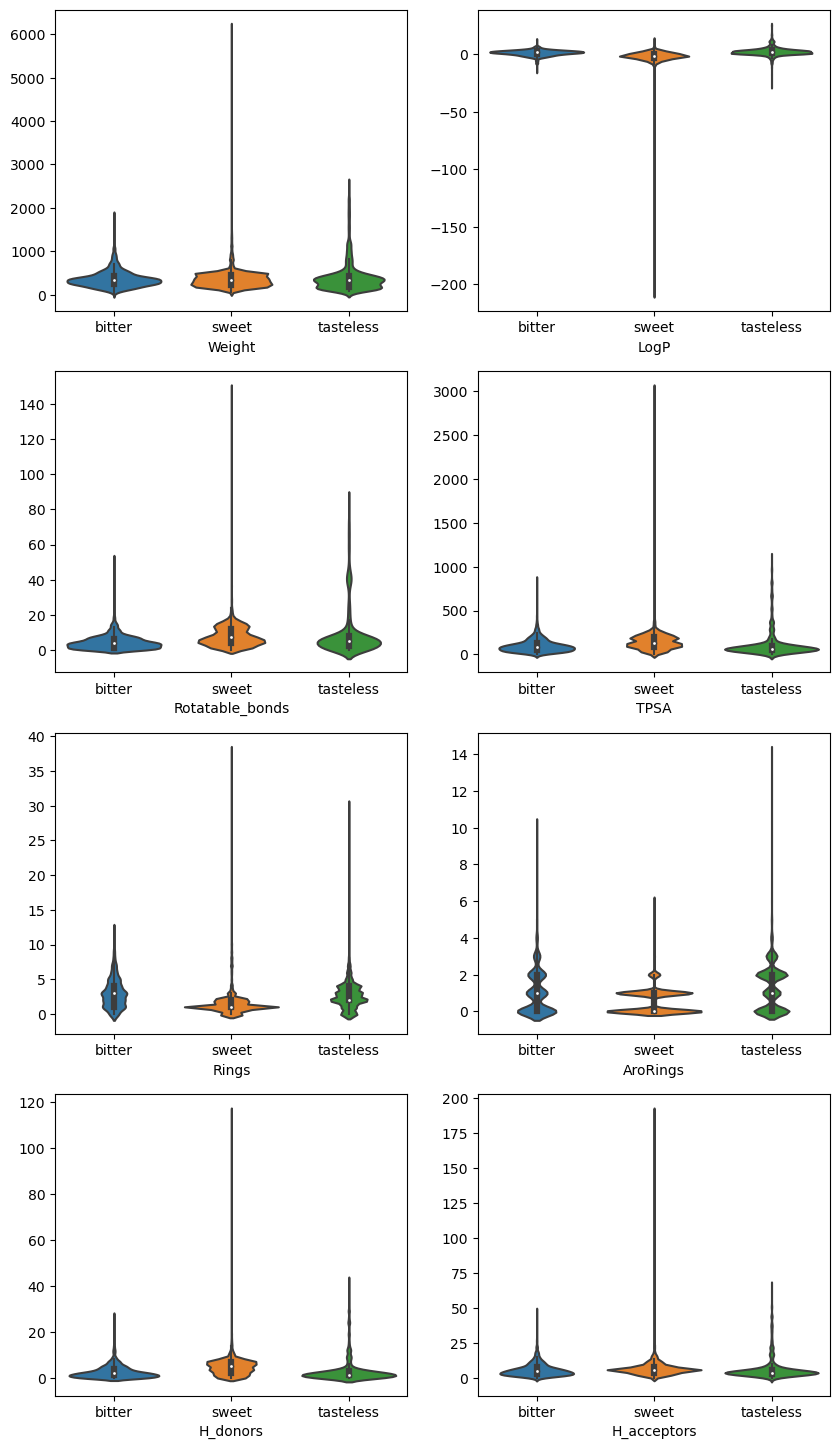

In [28]:
fig_violin

# PCA

In [1]:
import deepchem as dc
import pandas as pd
import numpy as np
from rdkit import Chem

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [3]:
data = pd.read_csv('BST.csv',encoding = 'gb2312')

In [4]:
data

,Name,SMILES,Flavor type,Data resource,Label
0,Conessine hydrobromide,Br.Br.CC1C2CCC3C4CC=C5CC(N(C)C)CCC5(C)C4CCC32CN1C,Bitter,"BitterSweet, PlantMolecularTasteDB, BitterDB, ...",[1]
1,Arecoline hydrobromide,Br.COC(=O)C1=CCCN(C)C1,Bitter,"BitterSweet, BitterDB, ChemTasteDB",[1]
2,Avocadyne,C#CCCCCCCCCCCCC(O)CC(O)CO,Bitter,"PlantMolecularTasteDB, BitterDB, ChemTasteDB",[1]
3,"1-Acetoxy-2,4-dihydroxyheptadeca-16-yne",C#CCCCCCCCCCCCC(O)CC(O)COC(C)=O,Bitter,"BitterDB, ChemTasteDB",[1]
4,Hydrogen cyanide,C#N,Bitter,"BitterSweet, BitterDB, ChemTasteDB",[1]
...,...,...,...,...,...
13021,CNP0005404,O=C1N(CC2=NC=CC=C2)CC3N1CCN(CC=4C=CC=CC4)C3,Tasteless,Coconut,[3]
13022,CNP0005405,O=C1N(CC=2C=NC=CC2)CC3N1CCN(C3)C4CCOCC4,Tasteless,Coconut,[3]
13023,CNP0005406,O=C1N(C=2C=CC=CC2)CC3N1CCN(C3)C4CCN(C(=O)C)CC4,Tasteless,Coconut,[3]
13024,CNP0005407,O=C1N(C=2C=CC=CC2)CC3N1CCN(CC4=NC=CC=C4)C3,Tasteless,Coconut,[3]


In [9]:
featurizer = dc.feat.MACCSKeysFingerprint()
bitter = featurizer.featurize(data['SMILES'][0:1946])
sweet = featurizer.featurize(data['SMILES'][1946:8045])
tasteless = featurizer.featurize(data['SMILES'][8045:])

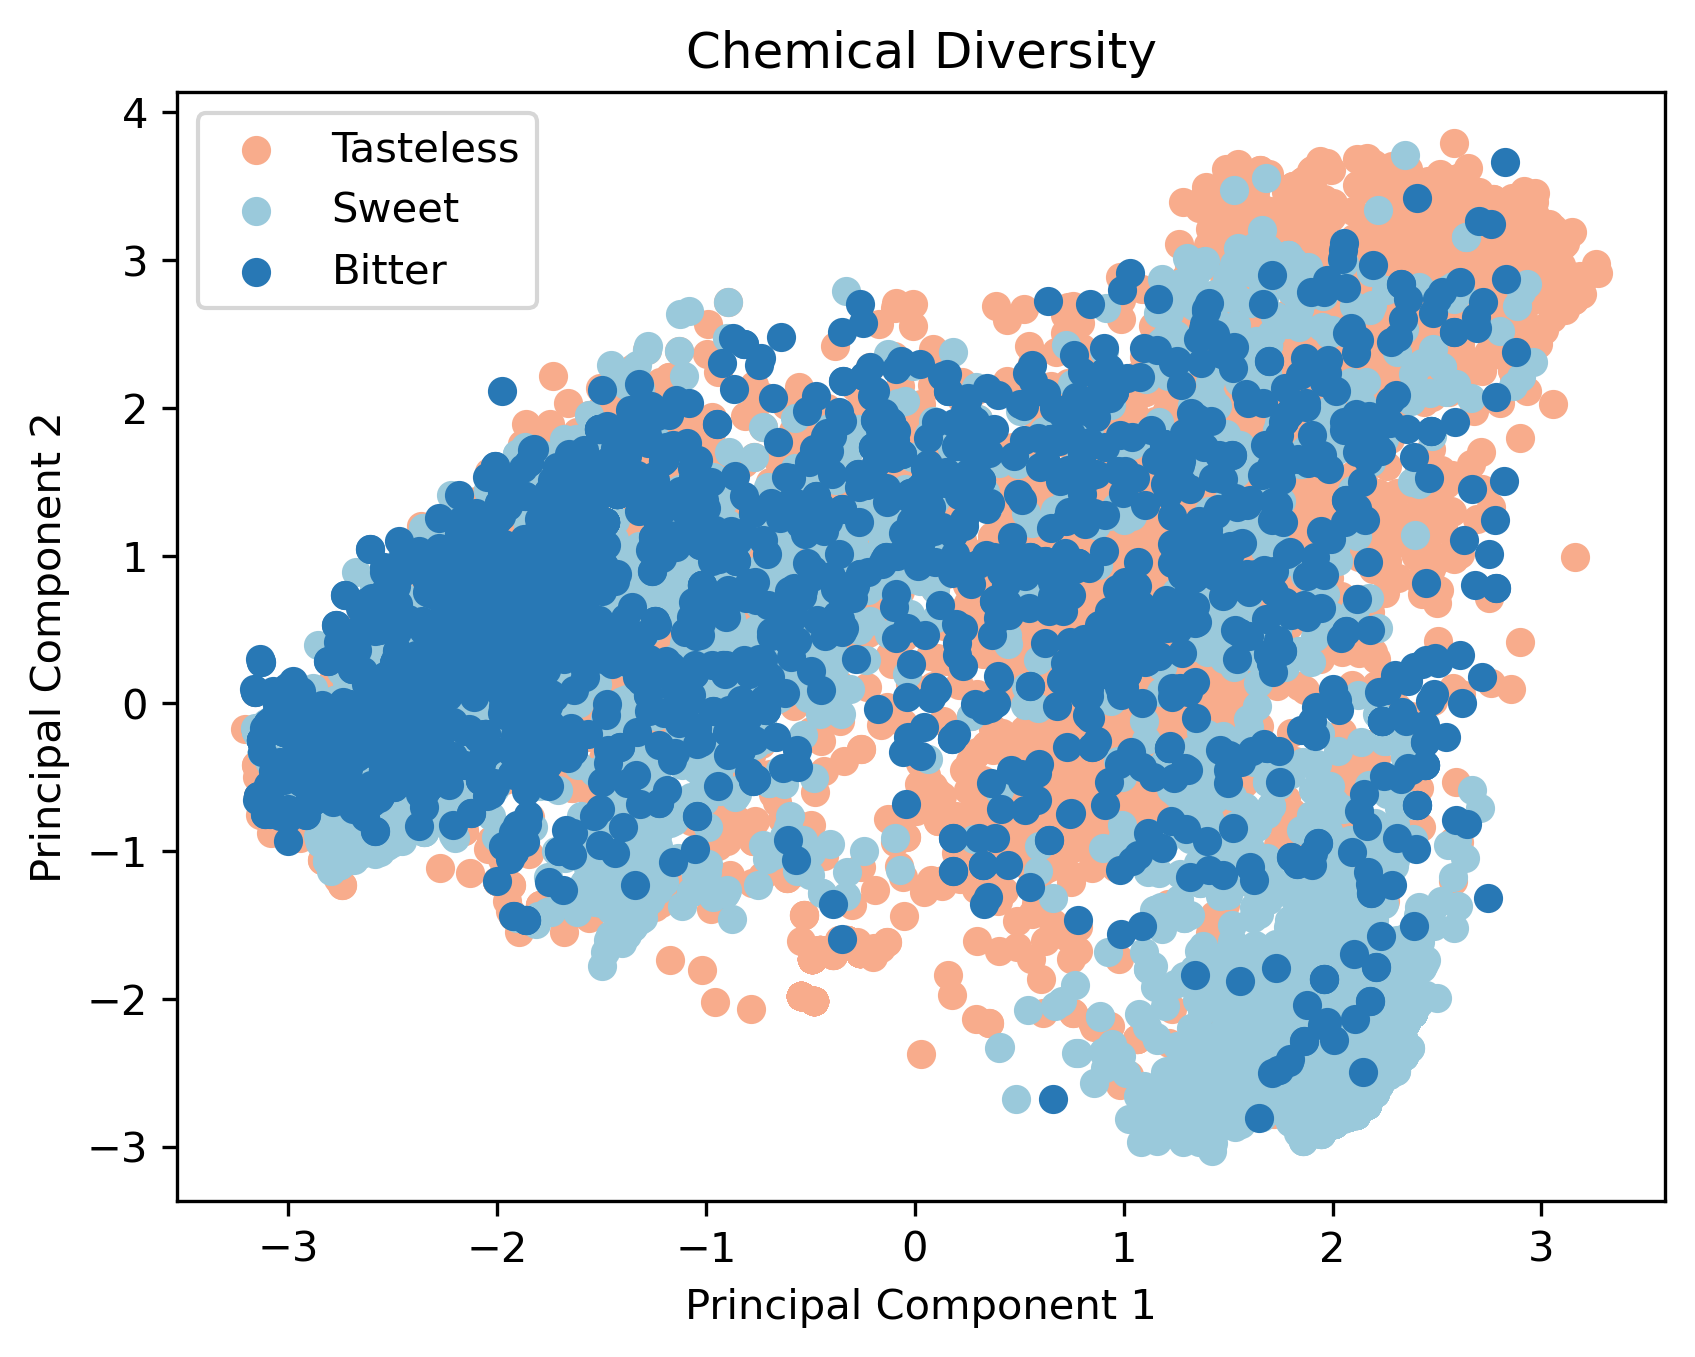

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = np.concatenate((bitter, sweet, tasteless), axis=0)

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(features)

bitter_transformed = transformed_data[0:1946]
sweet_transformed = transformed_data[1946:8045]
tasteless_transformed = transformed_data[8045:]

plt.scatter(tasteless_transformed[:, 0], tasteless_transformed[:, 1], label='Tasteless', color='#F8AC8C')
plt.scatter(sweet_transformed[:, 0], sweet_transformed[:, 1], label='Sweet', color='#9AC9DB')
plt.scatter(bitter_transformed[:, 0], bitter_transformed[:, 1], label='Bitter',color='#2878B5')



# plt.legend()
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization')
# plt.show()

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Chemical Diversity')


plt.show()

# PAC train_test

In [32]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = (.98 * (1 - .98)))

X_new = vt.fit_transform(features)
dataset = dc.data.NumpyDataset(X_new,data['Label'],ids=data['SMILES'])

In [44]:
splitter = dc.splits.RandomSplitter()
train_dataset,test_dataset = splitter.train_test_split(dataset=dataset,frac_train=0.8,seed=300)

In [45]:
train_dataset.X

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

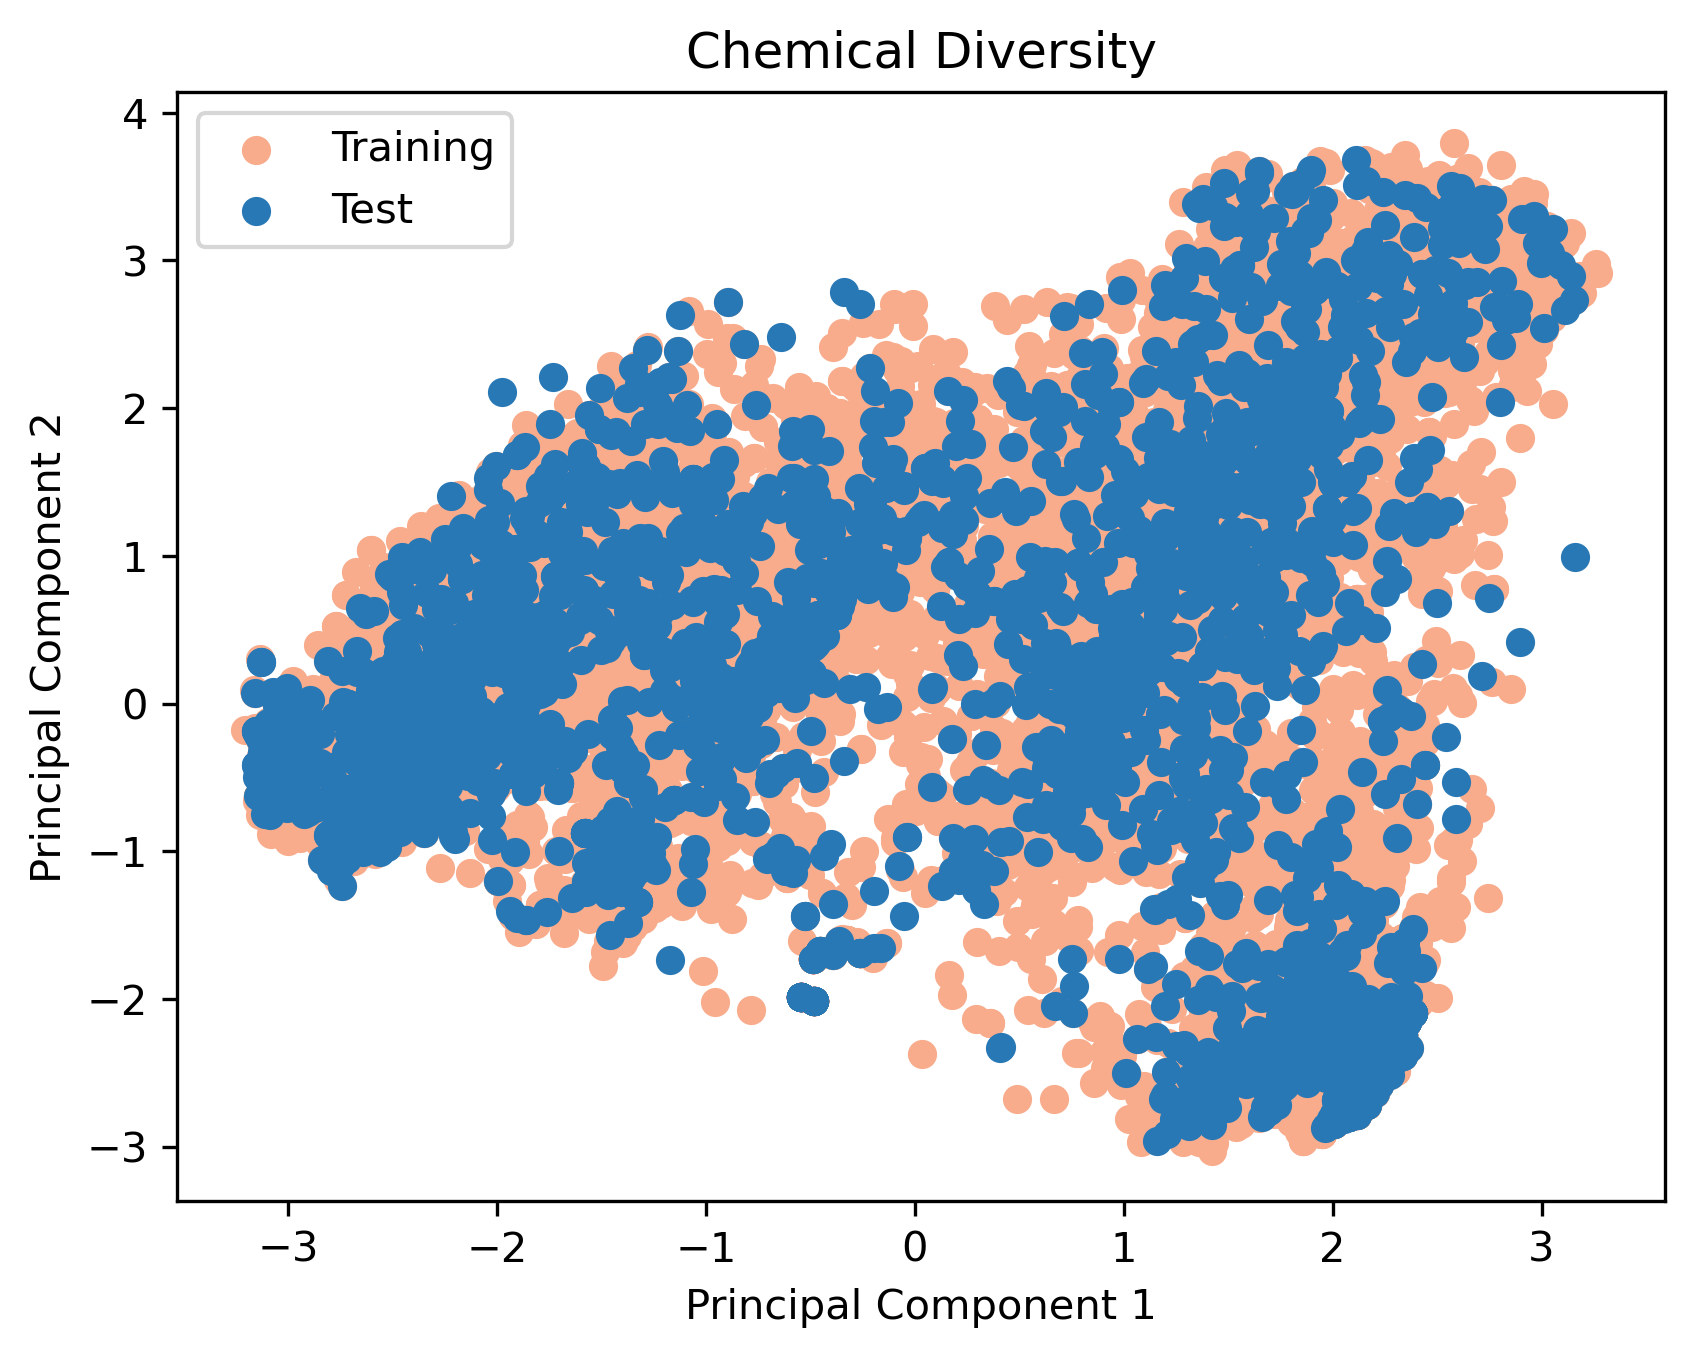

In [57]:
features_train_test = np.concatenate((train_dataset.X,test_dataset.X), axis=0)

pca_t_s = PCA(n_components=2)
transformed_data_t_s = pca_t_s.fit_transform(features_train_test)

# bitter_transformed = transformed_data[0:1946]
# sweet_transformed = transformed_data[1946:8045]
# tasteless_transformed = transformed_data[8045:]

train_dataset_t_s = transformed_data_t_s[0:10420]
test_dataset_t_s = transformed_data_t_s[10420:]

plt.scatter(train_dataset_t_s[:, 0], train_dataset_t_s[:, 1], label='Training', color='#F8AC8C')
plt.scatter(test_dataset_t_s[:, 0], test_dataset_t_s[:, 1], label='Test', color='#2878B5')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Chemical Diversity')


plt.show()